In [6]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace


In [7]:

# ---------------------------------------------------------------------
def plot_overlaid_t_psd(base_dir=".", folders=("10days", "20days")):
    plt.figure(figsize=(8, 6))
    colour_cycle = plt.cm.tab10.colors
    true_plotted = False

    for idx, folder in enumerate(folders):
        path = os.path.join(base_dir, folder)
        f      = np.loadtxt(os.path.join(path, "f.txt"))
        T      = np.loadtxt(os.path.join(path, "T.txt"))
        std_T  = np.loadtxt(os.path.join(path, "std_T.txt"))
        with h5py.File(os.path.join(path, "mcmc_results.h5"), "r") as h5f:
            g         = h5f["mcmc"]
            ci = SimpleNamespace(
                u05 = g["npsd_u05"][...],
                med = g["npsd_med"][...],
                u95 = g["npsd_u95"][...],
            )
        col   = colour_cycle[idx % len(colour_cycle)]
        label = folder.replace("days", "-day").replace("months", "-month")

        plt.plot(f, np.exp(ci.med), color=col, lw=1.4, label=label)
        plt.fill_between(f, np.exp(ci.u05), np.exp(ci.u95),
                         color=col, alpha=0.18, linewidth=0)

        if not true_plotted:                           # only once
            plt.plot(f, T / (std_T ** 2),
                     color="black", ls="--", lw=1.2, label="True PSD")
            true_plotted = True

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("PSD")
    plt.legend()
    plt.tight_layout()
    plt.show()


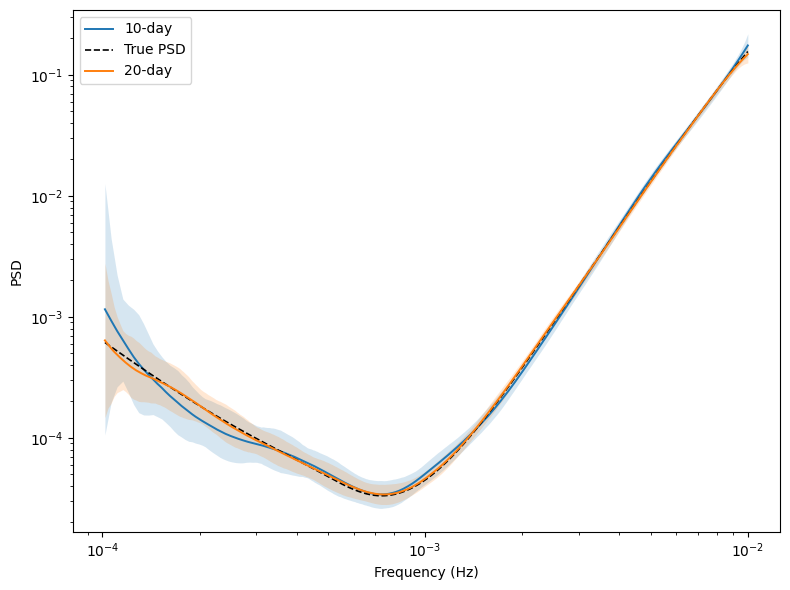

In [8]:
if True:
    plot_overlaid_t_psd(base_dir='/home/naim769/oneMonth/pcode/first/LISA/blocked/Guilliume')